必要なライブラリをインポート

In [30]:
# NumPy、Matplotlib、PyTorchをインポートする
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

CIFAR-10をダウンロードする

In [31]:


# ToTensor：画像のグレースケール化（RGBの0~255を0~1の範囲に正規化）、Normalize：Z値化（RGBの平均と標準偏差を0.5で決め打ちして正規化）
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# トレーニングデータをダウンロード
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# テストデータをダウンロード
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)



Files already downloaded and verified
Files already downloaded and verified


In [32]:
# 学習用データセット：縦横32ピクセルのRGBの画像が50000枚
print(trainset.data.shape)
(50000, 32, 32, 3)

# テスト用データセット：縦横32ピクセルのRGBの画像が10000枚
print(testset.data.shape)
(10000, 32, 32, 3)

# クラス一覧を確認する
print(trainset.classes)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# classesはよく利用するので別途保持しておく
classes = trainset.classes


(50000, 32, 32, 3)
(10000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [33]:
print(trainset[0][0].shape)
print(trainset[0][1])

torch.Size([3, 32, 32])
6


In [34]:
img = trainset[0][0].numpy()
print(type(img)) 
print(img.shape) 

<class 'numpy.ndarray'>
(3, 32, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


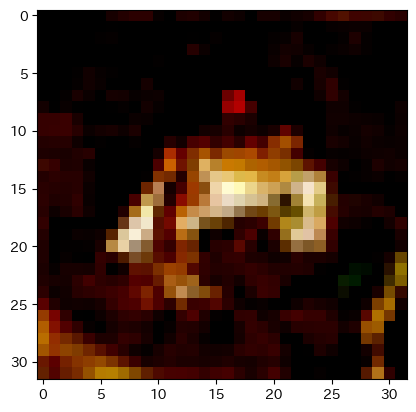

In [35]:
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)
plt.show()

画像を表示

In [36]:


# ダウンロードした画像を表示してみる
def imshow(img):
    # 非正規化する
    img = img / 2 + 0.5
    # torch.Tensor型からnumpy.ndarray型に変換する
    print(type(img)) # 
    npimg = img.numpy()
    print(type(npimg))    
    # 形状を（RGB、縦、横）から（縦、横、RGB）に変換する
    print(npimg.shape)
    npimg = np.transpose(npimg, (1, 2, 0))
    print(npimg.shape)
    # 画像を表示する
    plt.imshow(npimg)
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))



AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute 'next'

ネットワークを実装する

In [ ]:
# CNNを実装する
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

損失関数・オプティマイザを定義する

In [ ]:
# 交差エントロピー
criterion = nn.CrossEntropyLoss()
# 確率的勾配降下法
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

トレーニング

In [ ]:
# トレーニングする
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # 誤差逆伝播
        loss.backward()
        optimizer.step()
        train_loss = loss.item()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')


[1,  2000] loss: 2.202
[1,  4000] loss: 1.829
[1,  6000] loss: 1.665
[1,  8000] loss: 1.568
[1, 10000] loss: 1.525
[1, 12000] loss: 1.471
[2,  2000] loss: 1.392
